In [19]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/'

In [20]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/'

In [21]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [22]:
import matplotlib

In [23]:
system_name = ['gem5','pcm']
calibs = 'Uncalib'

all_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld',
                        'ML2_BW_st','MM']

zm_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CRd','CS1','CS3','EI','EF','ED1','EM1','EM5','MI','MC'
                 ,'MCS','MI','MD','MIM','MIM2']

control_cond_benchmarks = ['CCa','CCe','CCm','CCh_st']

control_benchmarks = ['CRf','CRm','CRd','CS1','CS3']

memory_benchmarks = ['MC','MCS','MI','MIM','MIM2']

mcs =['MC','MCS']

execution_benchmarks = ['EI','EF','ED1','EM1','EM5']


In [24]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '',filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
       # print(r[start:end])
        return float(r[start:end])

In [7]:
#Function to extract stats from PCM
def pcmGetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 2
        end = r.find('\n', start)
       # print(r[start:end])
        return float(r[start:end])


## GEM5 DATAFRAME

In [8]:
rows = []
for bm in zm_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                 gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])
gem5_df['Cond_branch_mispred'] = gem5_df['CondIndirect']/gem5_df['CondPred']
gem5_df['Total_branch_mispred'] =gem5_df['Total_mispred']/gem5_df['Total_branches']







## PCM DATAFRAME

In [9]:
rows =[]

#IPC,Branch_total, branch_total_miss,Cond_total,Cond_Miss,Memory_loads_miss, Memory__FB_hits, Total_load_memory,
#RFO_L2hits,RFO_l2miss, Total_store

for bm in control_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'IPC'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_TOTAL_INSTR_RETIRED_events'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_TOTAL_events'),
                    None,None,
                    None,None,None,None,None,None
                ])
    
for bm in control_cond_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_COND_INSTR_RETIRED_events'),
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_RETIRED_events'),  
                 None,None,None,None,None,None
                ])
    
for bm in execution_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,None,None,
                 None,None,None,None,None,None
                ])
    
for bm in memory_benchmarks:
        rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                     None,None,
                     None,None,
                     None,None,None,None,None,None])
        
for bm in memory_benchmarks:
    rows.append([bm,None,
                    None,None,
                    None,None,
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_L1_MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_FB_HIT'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_LOADS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2HITS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_STORES'),
                ])
        

pcm_df = pd.DataFrame(rows, columns=['benchmark',
                                     'ipc','Total_branches','Total_mispred','CondTotal','CondPred','L1_load_miss','FB_hit',
                                     'Total_loads','RFO_L2_hits','RFO_L2_miss','Total_stores'])

pcm_df['Total_branch_mispred'] = pcm_df['Total_mispred']/pcm_df['Total_branches']

pcm_df['Cond_branch_mispred'] =pcm_df['CondPred']/pcm_df['CondTotal']

pcm_df['Total_L1_misses'] = (pcm_df['L1_load_miss'] ) + (pcm_df['RFO_L2_hits'] + pcm_df['RFO_L2_miss']) 

pcm_df['Total_access'] = (pcm_df['Total_loads']+pcm_df['Total_stores'])

pcm_df['L1_missrate'] = pcm_df['Total_L1_misses']/pcm_df['Total_access']

print(pcm_df)

   benchmark       ipc  Total_branches  Total_mispred  CondTotal  CondPred  \
0        CRf  1.348720         41170.0          349.0        NaN       NaN   
1        CRm  0.860635         15339.0         1440.0        NaN       NaN   
2        CRd  2.311780      21505524.0       144562.0        NaN       NaN   
3        CS1  1.060510         18187.0          146.0        NaN       NaN   
4        CS3  2.230400        532687.0         1259.0        NaN       NaN   
5        CCa  1.190300             NaN            NaN   130681.0     559.0   
6        CCe  2.221530             NaN            NaN   259212.0     661.0   
7        CCm  1.649370             NaN            NaN   258183.0     576.0   
8     CCh_st  2.497010             NaN            NaN   258681.0     553.0   
9         EI  2.864130             NaN            NaN        NaN       NaN   
10        EF  2.451400             NaN            NaN        NaN       NaN   
11       ED1  0.462403             NaN            NaN        NaN

In [11]:
## Stacked Graph
def doplot_stacked_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[gem5_df['benchmark']==bm]
            ax.bar(i,d[stat_pcm], color='C'+str(1))
            ax.bar(i,g[stat_gem5], color='C'+str(0))
            i=i+1
        
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    new_names = benchmark_names + benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names)), benchmark_names, rotation=40, ha='right')

In [10]:
##Graph
def doplot_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d=pcm_df[pcm_df['benchmark']==bm]
        g=gem5_df[gem5_df['benchmark']==bm]
        ax.bar(i,d[stat_pcm], color='C'+str(1))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(0))
        i=i+2
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+i/2, benchmark_names, rotation=40, ha='right')

In [13]:
    test1 = gem5_df[gem5_df['benchmark']=='MC']
    test2 = pcm_df[pcm_df['benchmark']=='MC']
    
    print(pcm_df['MEM_INST_RETIRED_ALL_LOADS'])

    print(gem5_df[''])
  

## IPC

<IPython.core.display.Javascript object>


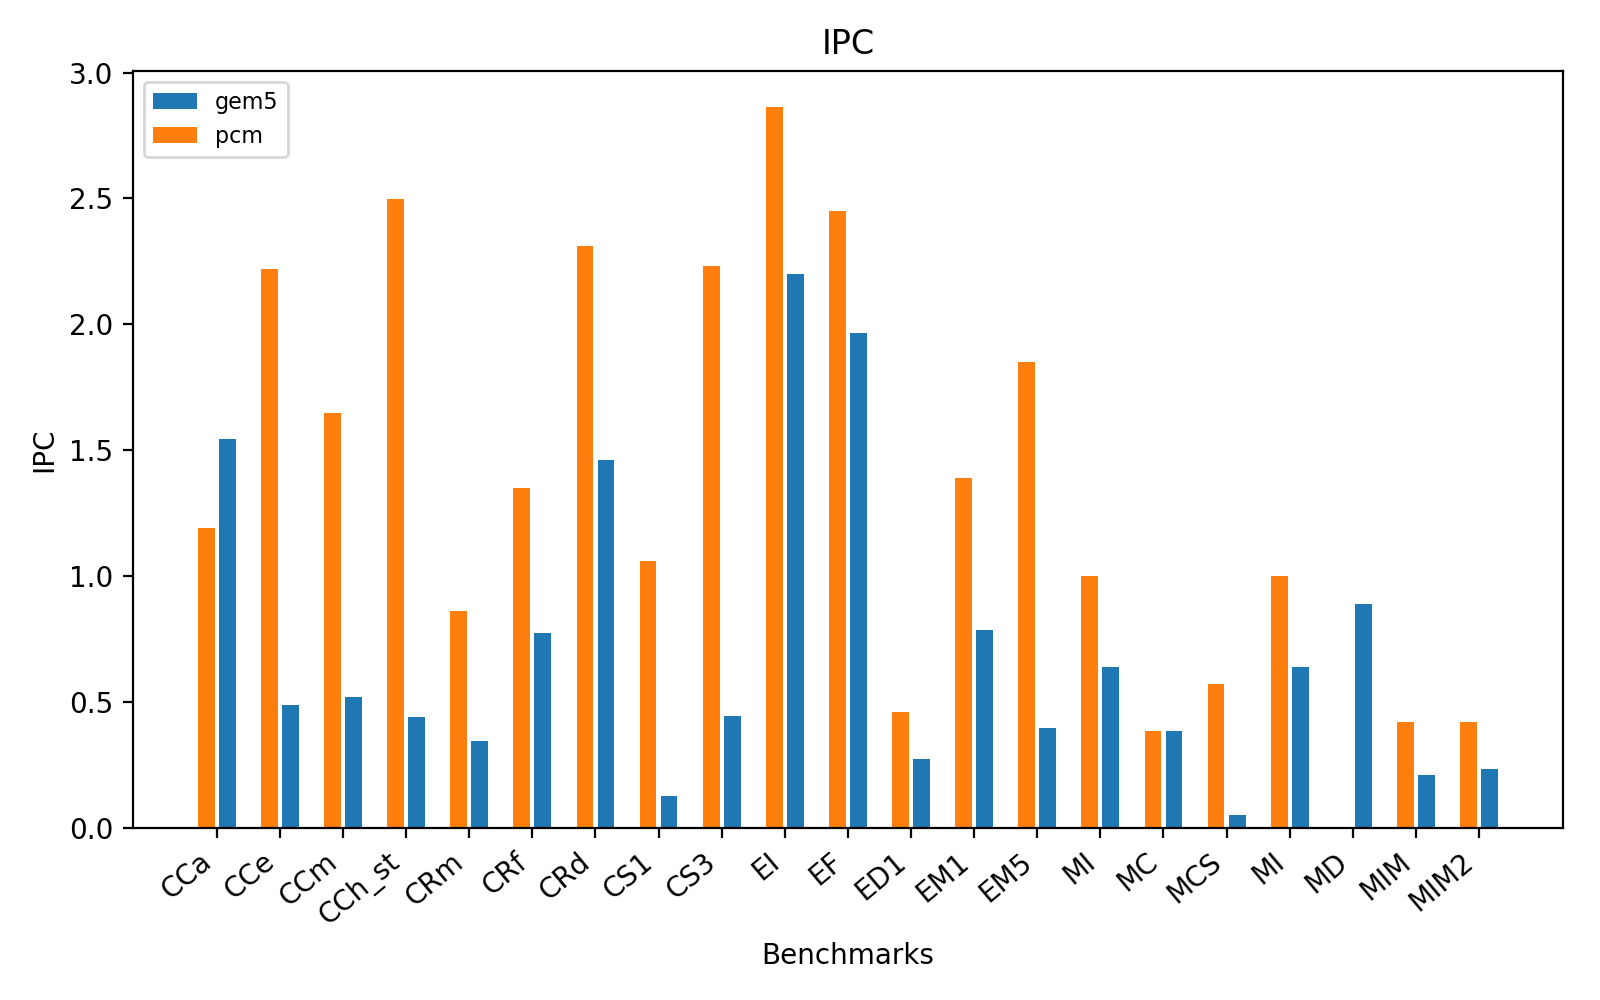

In [11]:
#IPC

benchmarks = zm_benchmarks
benchmark_names = zm_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'ipc','ipc')
plt.ylabel('IPC')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC')
plt.tight_layout()
plt.savefig('IPC_hw+gem5.png', format='png', dpi=600)


## Control conditonal branch misses

<IPython.core.display.Javascript object>


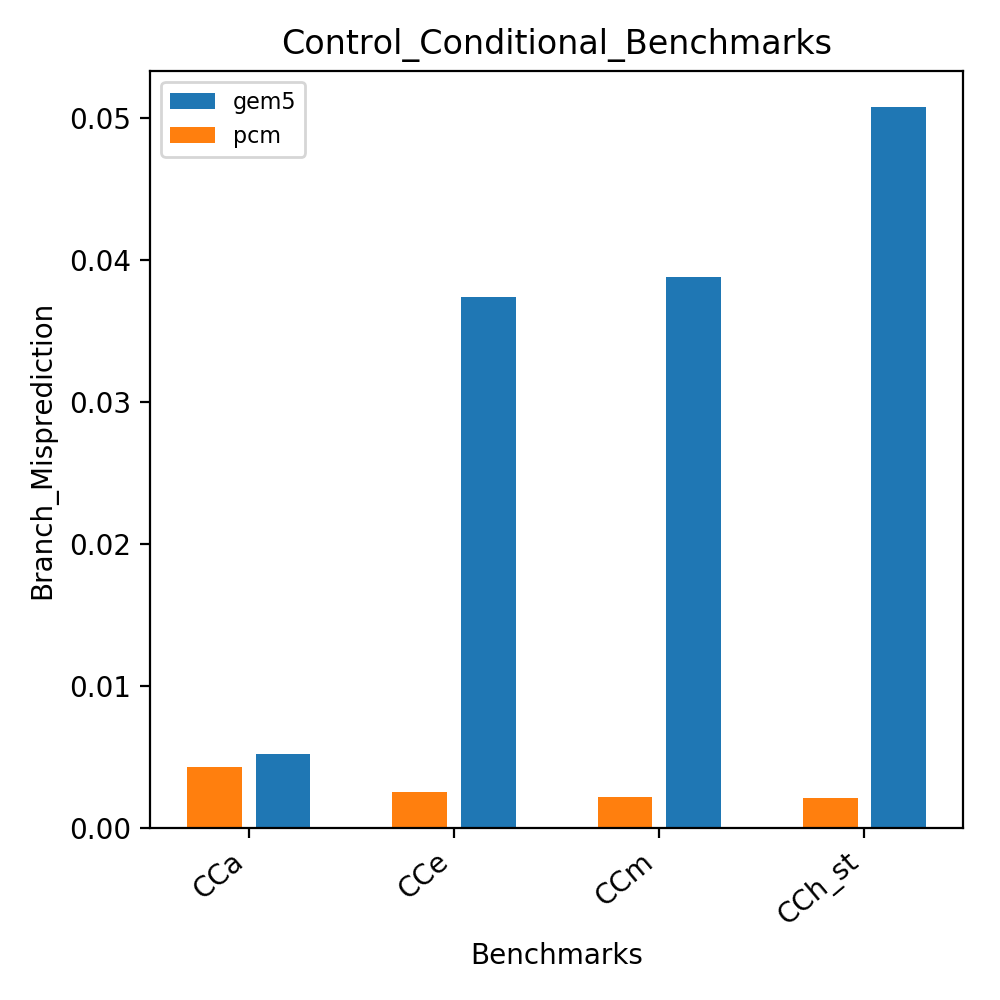

In [31]:
#Control condiitonal branch misses

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Conditional_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_Cc_hw+gem5.png', format='png', dpi=600)

## Control Branch misses

<IPython.core.display.Javascript object>


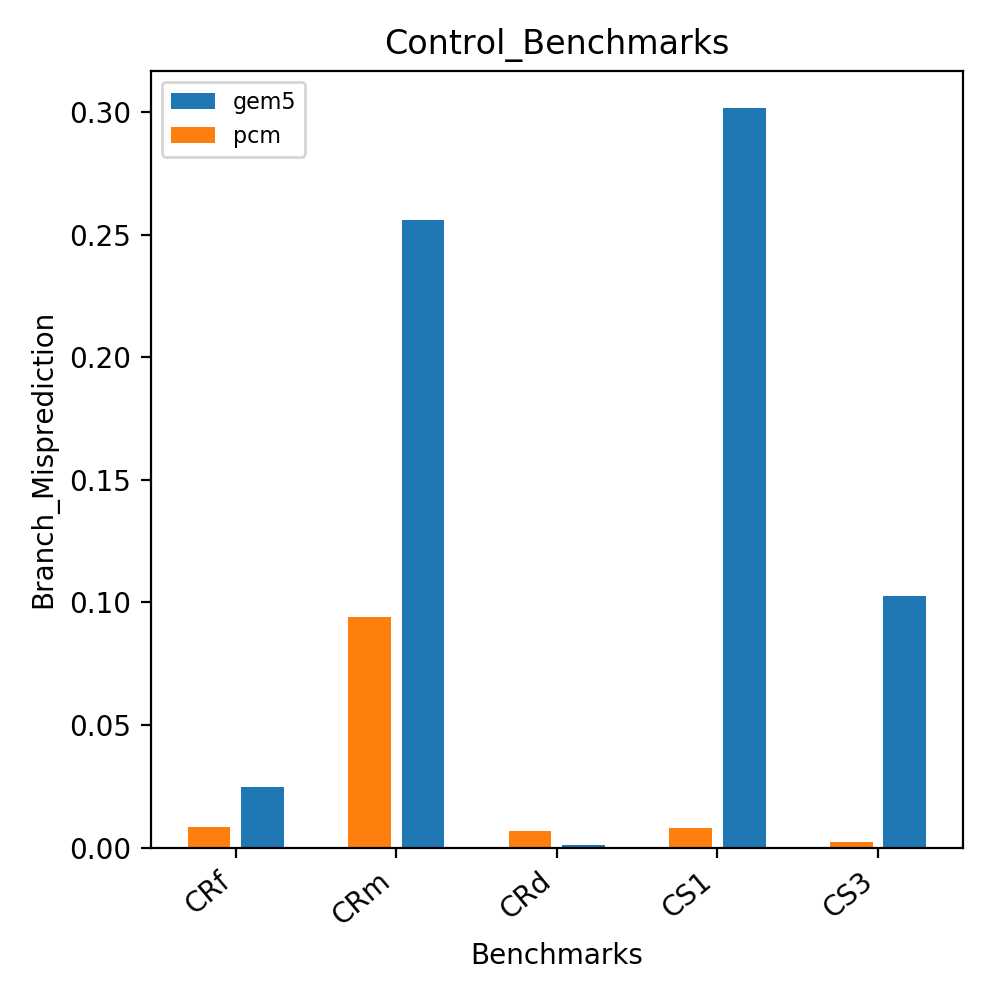

In [14]:
#Control Branch misses

benchmarks = control_benchmarks
benchmark_names = control_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Total_branch_mispred','Total_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_hw+gem5.png', format='png', dpi=600)

## L1 misses

<IPython.core.display.Javascript object>


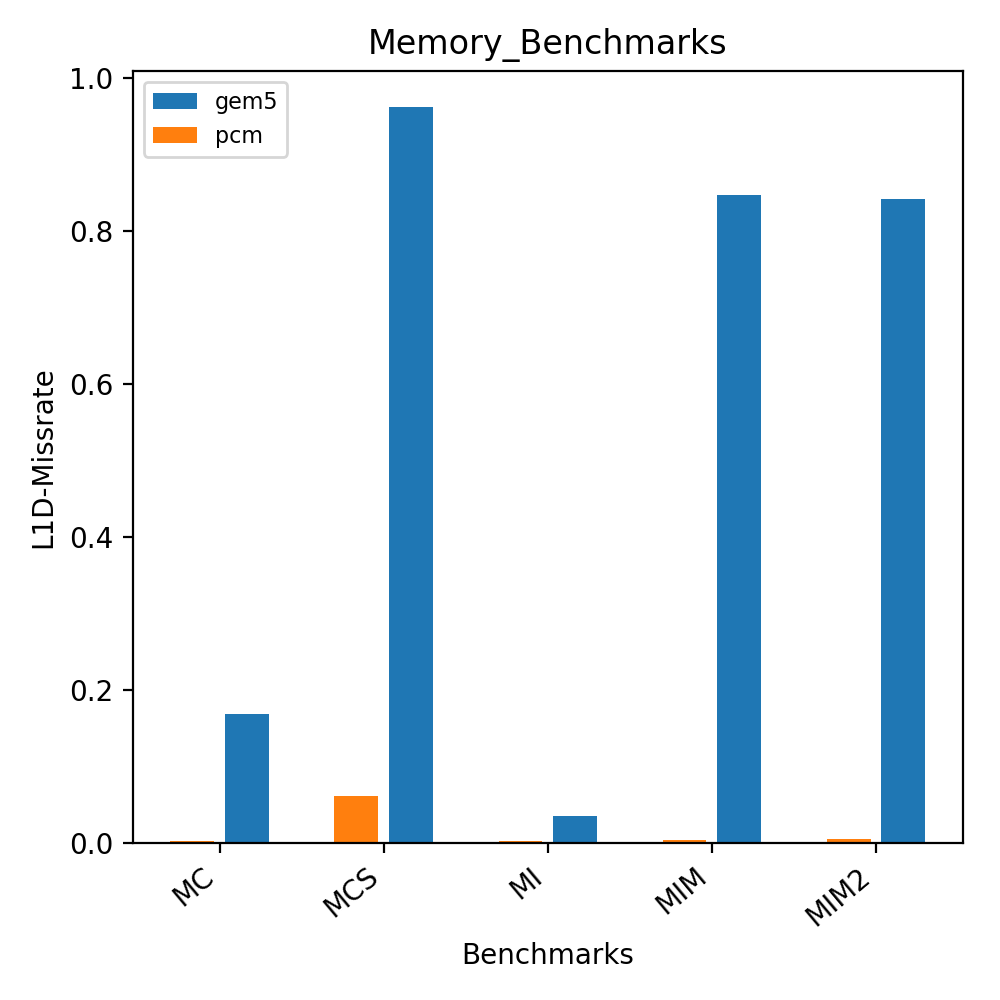

In [12]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)

## --------------------------------------------------------------------------------------------------------
# Control Benchmarks Analysis

## Different Iterations dataframe

In [141]:
iters = ['1M','5M','1.7M','3M','2.5M','7.5M']

In [142]:
#Control Benchmark:

rows = []
for i in iters:
    for bm in control_cond_benchmarks:
        rows.append([i,bm,gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                       gem5GetStat('control_iter'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches')
                    ])

gem5_df1 = pd.DataFrame(rows, columns=['itr','benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches'])
gem5_df1['Cond_branch_mispred'] = gem5_df1['CondIndirect']/gem5_df1['CondPred']
gem5_df1['Total_branch_mispred'] =gem5_df1['Total_mispred']/gem5_df1['Total_branches']


    

In [143]:
def doplot_cc_benchmarks(itr,benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d= pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']==itr)]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']==itr)]
        ax.bar(i,d[stat_pcm], color='C'+str(1))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(0))
        i=i+2
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+i/2, benchmark_names, rotation=40, ha='right')

In [144]:
rows =[]

#IPC,Branch_total, branch_total_miss,Cond_total,Cond_Miss,Memory_loads_miss, Memory__FB_hits, Total_load_memory,
#RFO_L2hits,RFO_l2miss, Total_store

for i in iters:   
    for bm in control_cond_benchmarks:
        rows.append([i,bm,pcmGetStat('control_iter'+'/'+i+'/'+system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                     pcmGetStat('control_iter'+'/'+i+'/'+system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_COND_INSTR_RETIRED_events'),
                     pcmGetStat('control_iter'+'/'+i+'/'+system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_RETIRED_events'),  
                    ])
    


pcm_df1 = pd.DataFrame(rows, columns=['itr','benchmark',
                                     'ipc','CondTotal','CondPred'
                                    ])

pcm_df1['Cond_branch_mispred'] =pcm_df1['CondPred']/pcm_df1['CondTotal']



## Different Iterations

<IPython.core.display.Javascript object>


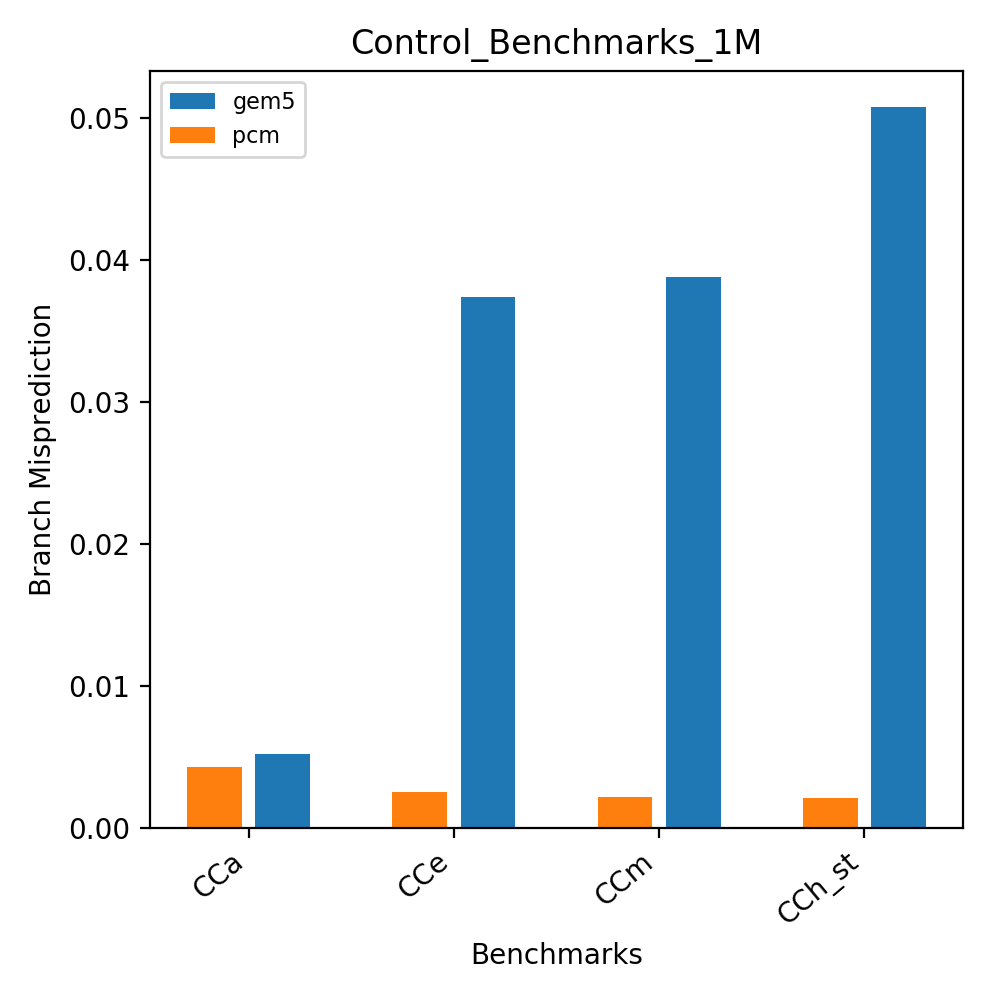

<IPython.core.display.Javascript object>


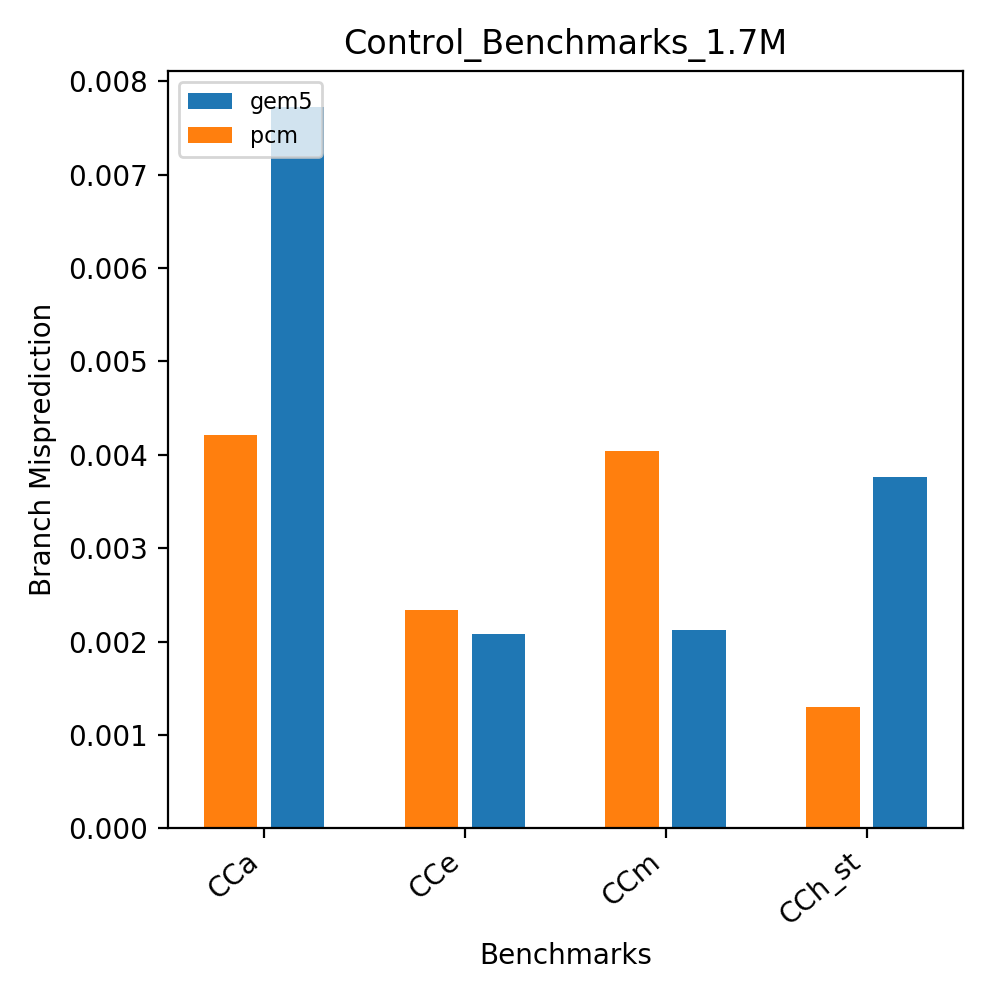

<IPython.core.display.Javascript object>


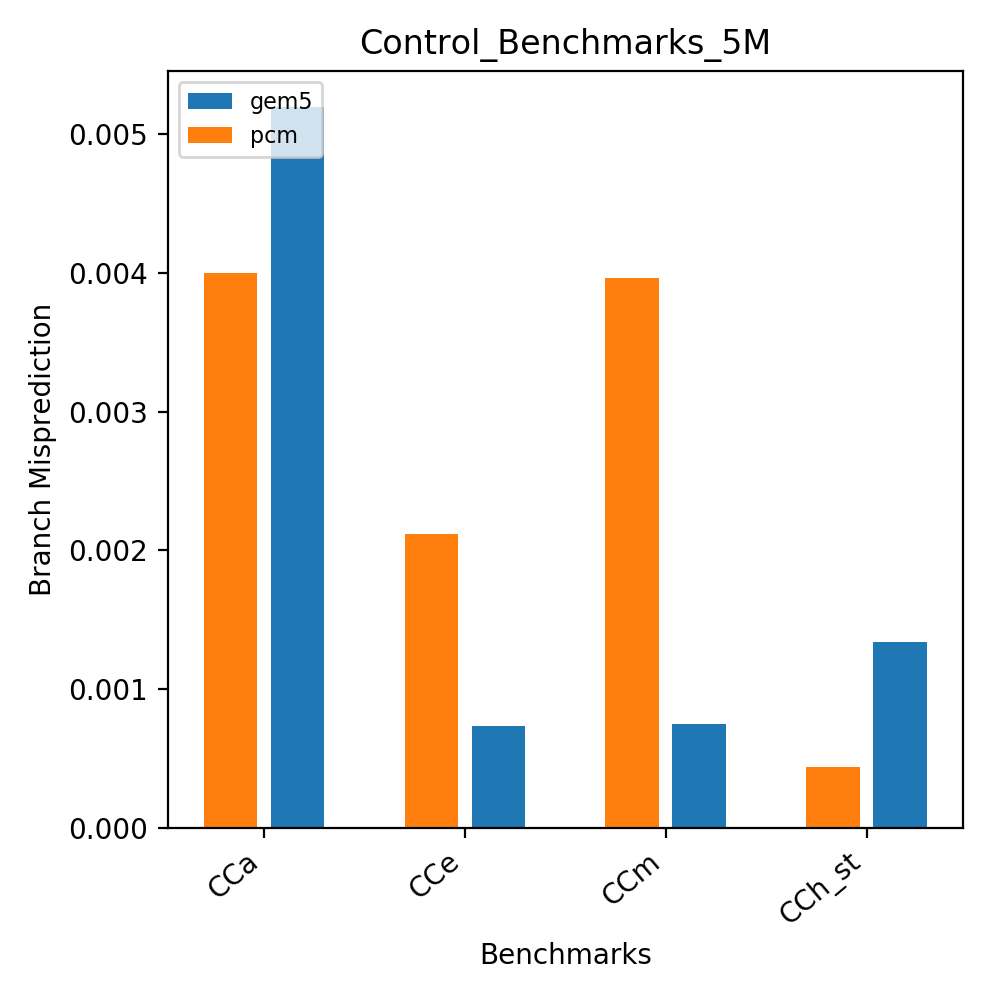

<IPython.core.display.Javascript object>


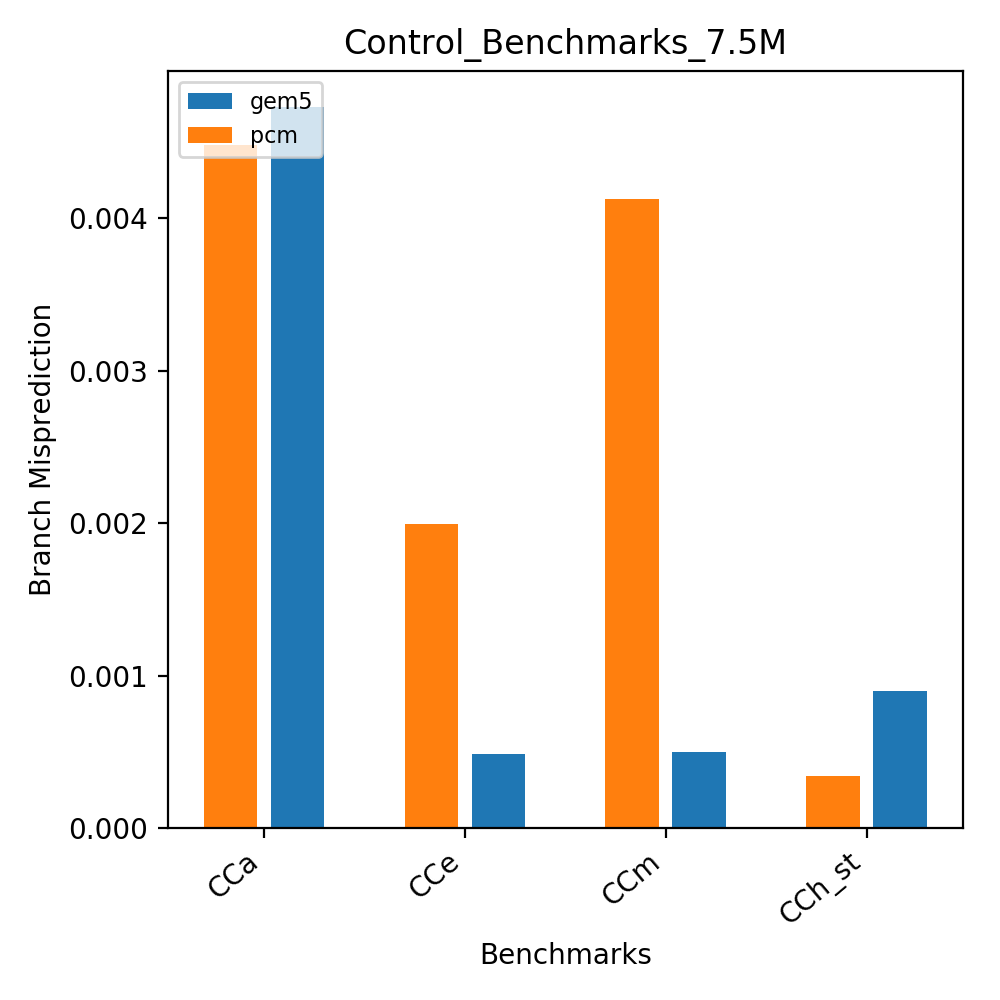

In [218]:

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_cc_benchmarks('1M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1M')
plt.tight_layout()
plt.savefig('Branchpred_cc_hw+gem5_1M.png', format='png', dpi=600)
doplot_cc_benchmarks('1.7M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1.7M')
plt.tight_layout()
plt.savefig('Branchpredcc_hw+gem5_1.7M.png', format='png', dpi=600)
doplot_cc_benchmarks('5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_5M')
plt.tight_layout()
plt.savefig('Branchpred_cc_hw_5M.png', format='png', dpi=600)
doplot_cc_benchmarks('7.5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_7.5M')
plt.tight_layout()
plt.savefig('Branchpred_cc_hw_7.5M.png', format='png', dpi=600)

## different predictors dataframe

In [204]:
iters_BP = ['1M','5M']

In [205]:
#Control Benchmark:
rows = []
for i in iters_BP:
    for bm in control_cond_benchmarks:
        rows.append([i,bm,gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                       gem5GetStat('control_iter_BP'+'/'+i+'/'+system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches')
                    ])

gem5_df2 = pd.DataFrame(rows, columns=['itr','benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches'])
gem5_df2['Cond_branch_mispred'] = gem5_df2['CondIndirect']/gem5_df2['CondPred']
gem5_df2['Total_branch_mispred'] =gem5_df2['Total_mispred']/gem5_df2['Total_branches']


In [206]:
##Graph
def doplot_pred_benchmarks(itr,benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = ['pcm','gem5_LTAGE','gem5_TBP']
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d= pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']==itr)]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']==itr)]
        g2=gem5_df2[(gem5_df2['benchmark']==bm) &(gem5_df2['itr']==itr)]
        ax.bar(i,d[stat_pcm], color='C'+str(0))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(1))
        i=i+1
        ax.bar(i,g2[stat_gem5], color='C'+str(2))
        i=i+3
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1+1)+i/2, benchmark_names, rotation=40, ha='right')

## Different Predictors

<IPython.core.display.Javascript object>


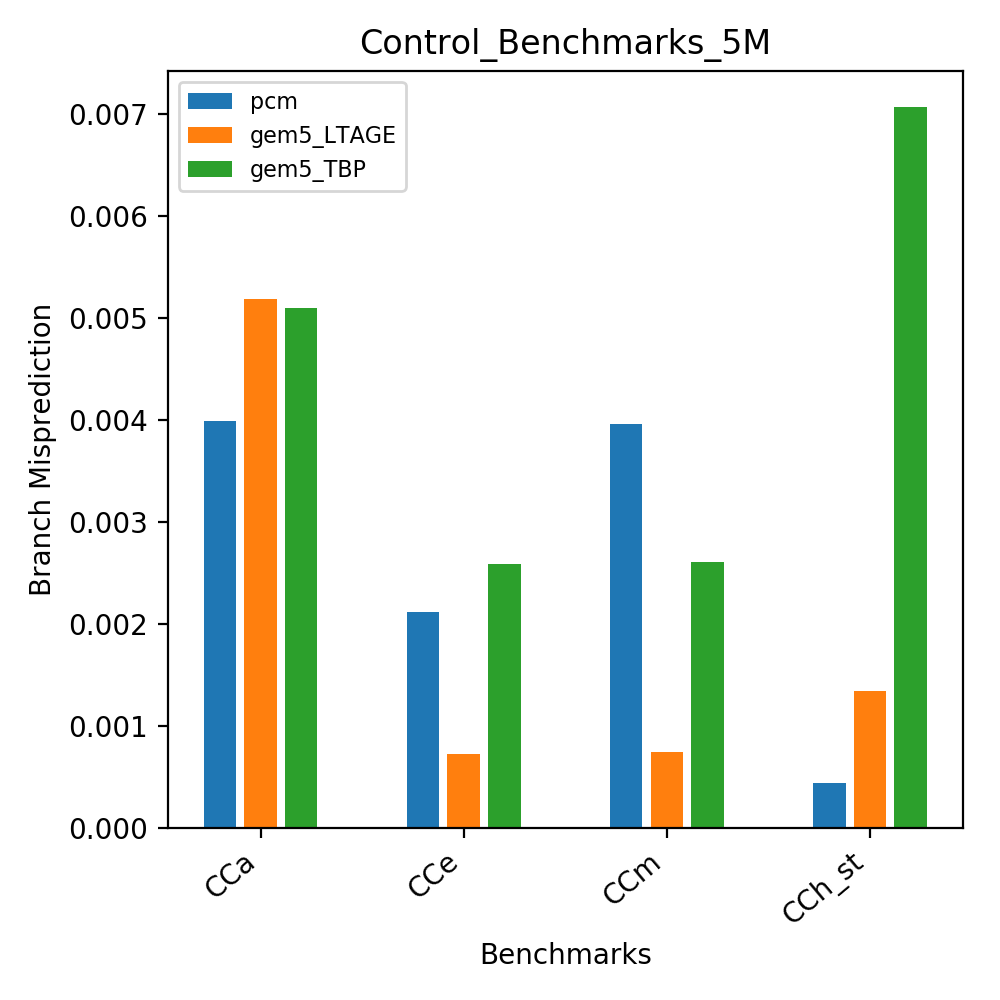

<IPython.core.display.Javascript object>


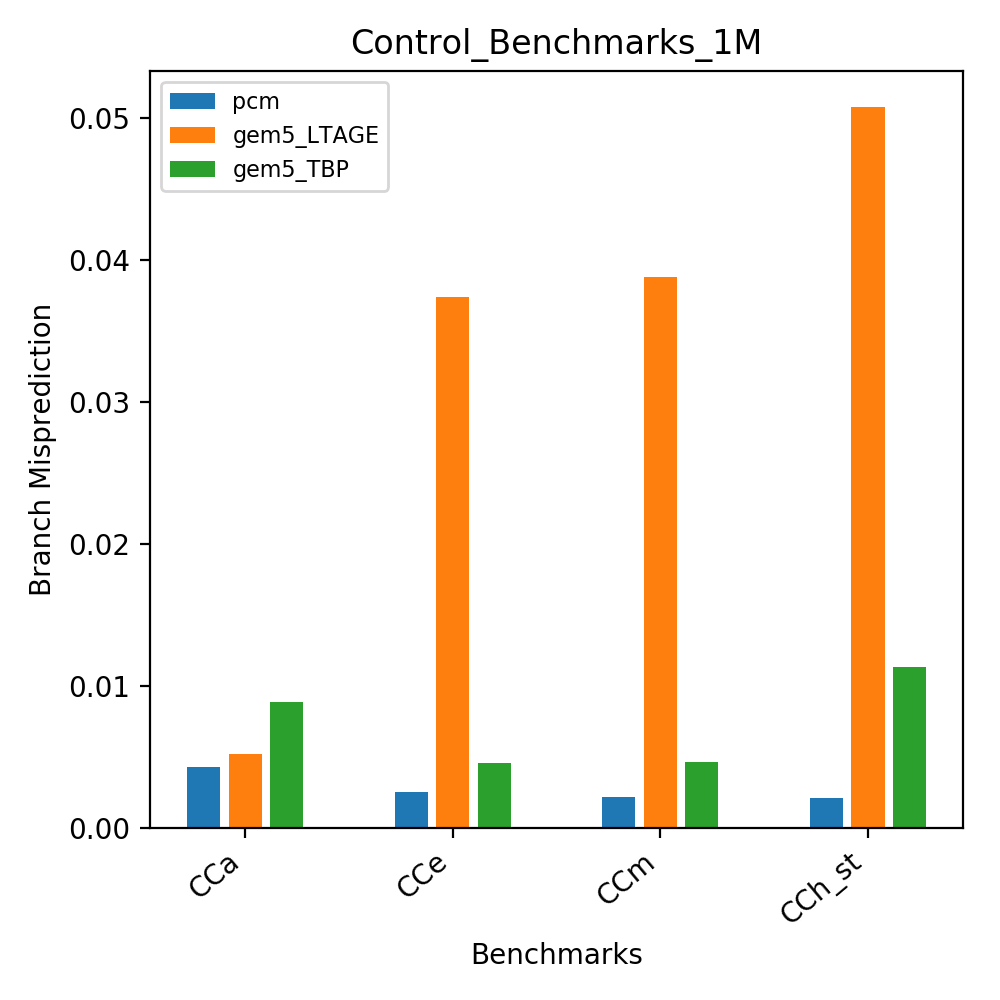

In [208]:
benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_pred_benchmarks('5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_5M')
plt.tight_layout()
plt.savefig('Branchpred_cc_BP_5m.png', format='png', dpi=600)
doplot_pred_benchmarks('1M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1M')
plt.tight_layout()
plt.savefig('Branchpred_cc_BP_1m.png', format='png', dpi=600)

## EXPERIMENTAL GRAPHS 

In [146]:
import matplotlib.patches as mpatches

In [168]:
def doplot_avg_benchmarks(itr,benchmarks,benchmark_names,stat_pcm,stat_gem5):
    plt.figure()
    i = 0
    system = system_name
    for bm in benchmarks:
        d= pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']==itr)]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']==itr)]
        plt.plot(i, d[stat_pcm], marker='o',color='r')
        plt.plot(i, g[stat_gem5], marker='o',color='b')
        i=i+1
        
    

    plt.xticks(np.arange(len(benchmark_names)), benchmark_names, rotation=40, ha='right')

In [201]:
def doplot_avg_1_benchmarks(itr,benchmarks,benchmark_names,stat_pcm,stat_gem5):
    plt.figure()
    i = 0
    system = system_name
    for bm in benchmarks:
        d= pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']=='1M')]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']=='1M')]
        plt.plot(i, d[stat_pcm], marker='o',color='r')
        plt.plot(i, g[stat_gem5], marker='o',color='b')
        i=i+1
        d = pcm_df1[(pcm_df1['benchmark']==bm) & (pcm_df1['itr']=='5M')]
        g=gem5_df1[(gem5_df1['benchmark']==bm) &(gem5_df1['itr']=='5M')]
        plt.plot(i, d[stat_pcm], marker='o',color='g')
        plt.plot(i, g[stat_gem5], marker='o',color='m')
        i=i+2

    

    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+.5, benchmark_names, rotation=40, ha='right')

<IPython.core.display.Javascript object>


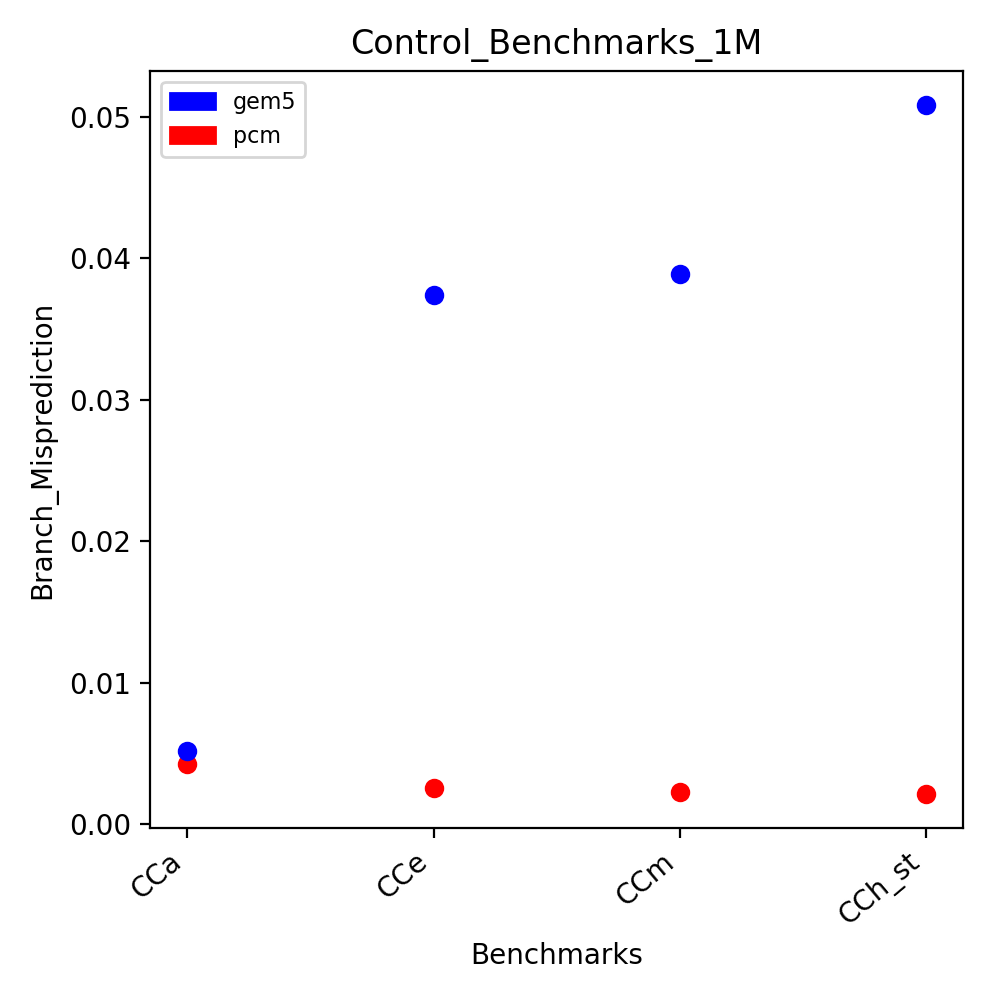

<IPython.core.display.Javascript object>


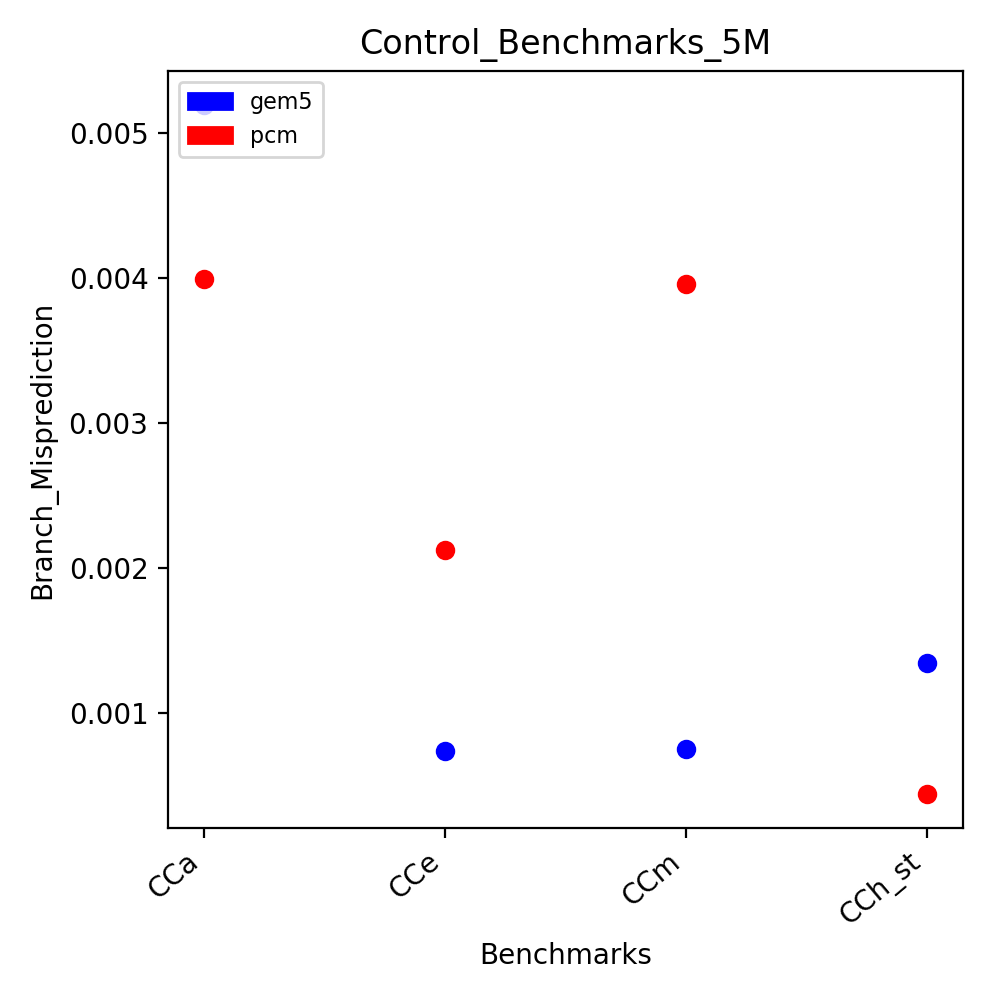

In [187]:
#Control Branch misses

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_avg_benchmarks('1M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
gem5 = mpatches.Patch(color='b', label='gem5')
pcm = mpatches.Patch(color='r', label='pcm')
plt.legend(handles=[gem5, pcm],loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1M')
plt.tight_layout()
plt.savefig('Branch_Misprediction_scatter_1Mhw+gem5.png', format='png', dpi=600)
doplot_avg_benchmarks('5M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
gem5 = mpatches.Patch(color='b', label='gem5')
pcm = mpatches.Patch(color='r', label='pcm')
plt.legend(handles=[gem5, pcm],loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_5M')
plt.tight_layout()
plt.savefig('Branch_Misprediction_scatter_5Mhw+gem5.png', format='png', dpi=600)

<IPython.core.display.Javascript object>


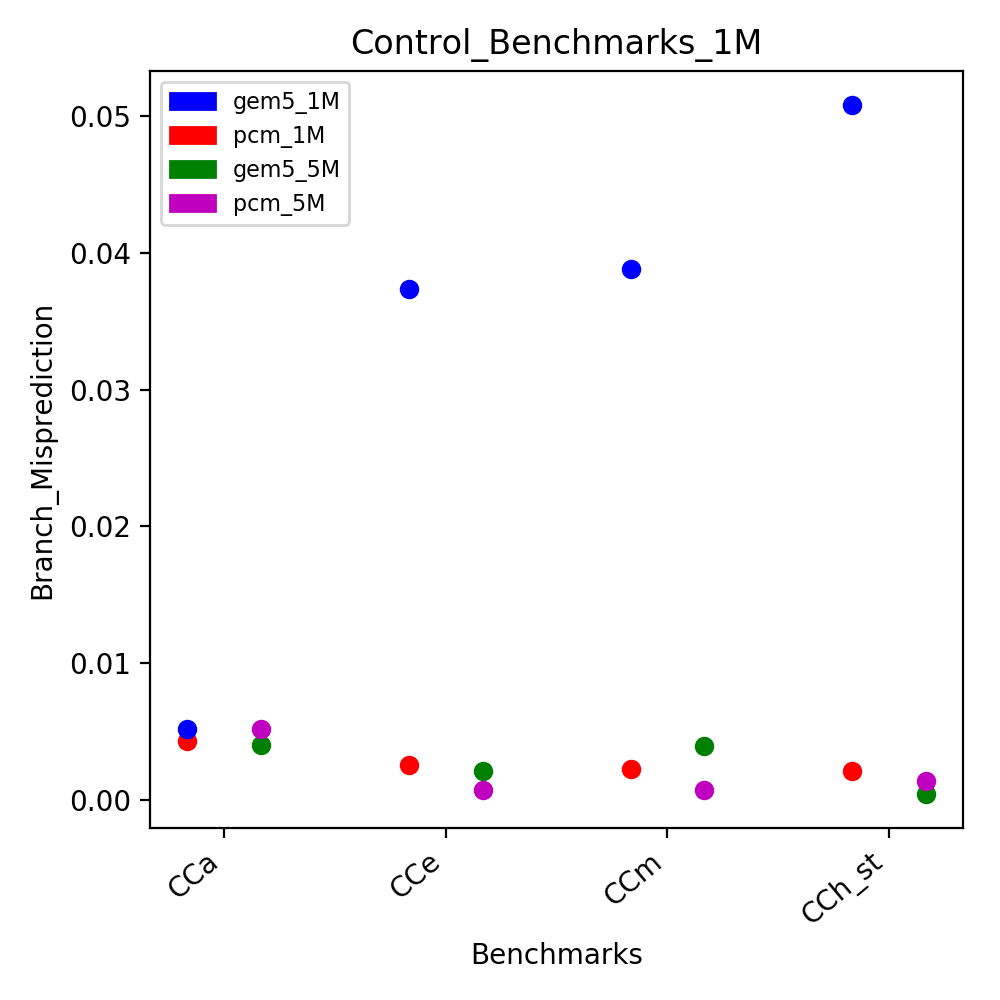

In [202]:
benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_avg_1_benchmarks('1M',benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
gem5_1M = mpatches.Patch(color='b', label='gem5_1M')
pcm_1M = mpatches.Patch(color='r', label='pcm_1M')
gem5_5M = mpatches.Patch(color='g', label='gem5_5M')
pcm_5M = mpatches.Patch(color='m', label='pcm_5M')
plt.legend(handles=[gem5_1M, pcm_1M,gem5_5M,pcm_5M],loc=2, prop={'size': 8})
plt.title('Control_Benchmarks_1M')
plt.tight_layout()
plt.savefig('Branch_Misprediction_scatter_1Mhw+gem5.png', format='png', dpi=600)

## --------------------------------------------------------------------------------------------------------
# Memory Benchmarks Analysis

In [27]:
rows = []
for bm in memory_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])


<IPython.core.display.Javascript object>


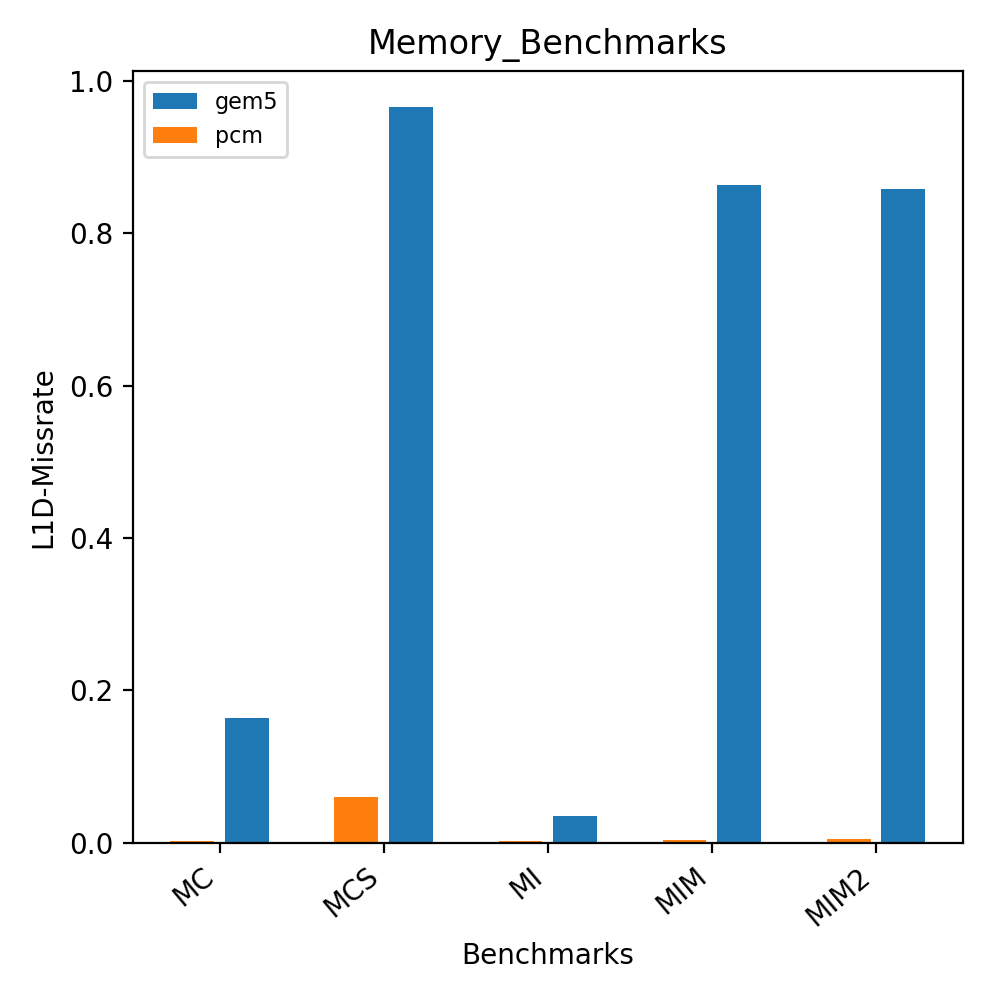

In [26]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)
